In [15]:
import numpy as np
import glob
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.stats as stats
from scipy.stats import wilcoxon
import numpy as np
from hmmlearn import hmm

# Define the observations
observations = np.array([[1, 0, 1, 0, 1], [0, 1, 0, 1, 0], [0, 0, 0, 1, 1]]).reshape(-1, 1)

# Define the lengths of the sequences
lengths = [5, 5, 5]

# Define the CategoricalHMM model
model = hmm.CategoricalHMM(n_components=2)

# Fit the model to the observations
model = model.fit(observations, lengths)

# Predict the hidden states
hidden_states = model.predict(observations)

# Get the probability of the observations
prob = model.score(observations, lengths)

# Print the hidden states and the probability
print("Hidden States: ", hidden_states)
print("Probability of Observations: ", prob)

Hidden States:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Probability of Observations:  -10.202515869925639


In [27]:
data= pd.read_pickle('/Users/aryal/Desktop/ForeCache/foreCache-interaction/ForeCache_Models/output/movies/movies_results_hmm.pkl')

In [28]:
data

,participant_id,user,threshold,ncp-1,rank
0,stu29_ade_p4,stu29_ade_p4,0.05,0.103261,3545
1,stu29_ade_p4,stu29_ade_p4,0.05,0.103261,1940
2,stu29_ade_p4,stu29_ade_p4,0.05,0.103261,3529
3,stu29_ade_p4,stu29_ade_p4,0.05,0.103261,33
4,stu29_ade_p4,stu29_ade_p4,0.05,0.103261,1137
...,...,...,...,...,...
31466,pro17_ace_p4,pro17_ace_p4,0.90,0.269231,4
31467,pro17_ace_p4,pro17_ace_p4,0.90,0.269231,4
31468,pro17_ace_p4,pro17_ace_p4,0.90,0.269231,4
31469,pro17_ace_p4,pro17_ace_p4,0.90,0.269231,5


In [29]:
data.drop(columns=['rank'], inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)
data

,participant_id,user,threshold,ncp-1
0,stu29_ade_p4,stu29_ade_p4,0.05,0.103261
184,stu29_ade_p4,stu29_ade_p4,0.10,0.149425
358,stu29_ade_p4,stu29_ade_p4,0.20,0.129870
512,stu29_ade_p4,stu29_ade_p4,0.30,0.148148
647,stu29_ade_p4,stu29_ade_p4,0.40,0.165217
...,...,...,...,...
31068,pro17_ace_p4,pro17_ace_p4,0.50,0.118519
31203,pro17_ace_p4,pro17_ace_p4,0.60,0.101852
31311,pro17_ace_p4,pro17_ace_p4,0.70,0.086420
31392,pro17_ace_p4,pro17_ace_p4,0.80,0.132075


In [30]:
data

,participant_id,user,threshold,ncp-1
0,stu29_ade_p4,stu29_ade_p4,0.05,0.103261
184,stu29_ade_p4,stu29_ade_p4,0.10,0.149425
358,stu29_ade_p4,stu29_ade_p4,0.20,0.129870
512,stu29_ade_p4,stu29_ade_p4,0.30,0.148148
647,stu29_ade_p4,stu29_ade_p4,0.40,0.165217
...,...,...,...,...
31068,pro17_ace_p4,pro17_ace_p4,0.50,0.118519
31203,pro17_ace_p4,pro17_ace_p4,0.60,0.101852
31311,pro17_ace_p4,pro17_ace_p4,0.70,0.086420
31392,pro17_ace_p4,pro17_ace_p4,0.80,0.132075


In [31]:
# Create result DataFrame with columns for relevant statistics
result_dataframe = pd.DataFrame(columns=['User', 'Accuracy', 'Threshold', 'LearningRate', 'Discount', 'Algorithm', 'StateAccuracy'])

# Fill in the values according to the specification
result_dataframe['User'] = data['user']
result_dataframe['Accuracy'] = data['ncp-1']
result_dataframe['Threshold'] = data['threshold']
result_dataframe['LearningRate'] = 0
result_dataframe['Discount'] = 0
result_dataframe['Algorithm'] = 'HMM'
result_dataframe['StateAccuracy'] = 0

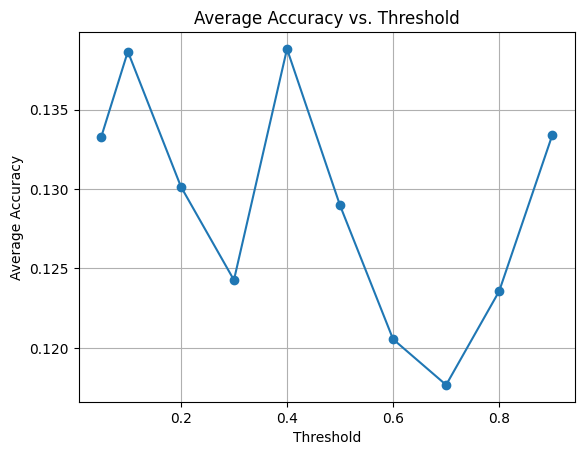

In [32]:
import matplotlib.pyplot as plt
# Group by Threshold and calculate average Accuracy
average_accuracy = result_dataframe.groupby('Threshold')['Accuracy'].mean()

# Plot the average accuracy
plt.plot(average_accuracy.index, average_accuracy.values, marker='o', linestyle='-')

# Set the labels and title
plt.xlabel('Threshold')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs. Threshold')

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
result_dataframe.to_csv()

In [79]:
fileNames2D = np.sort(glob.glob("./data/zheng/processed_interactions_p2/*"))
fileNames2D = np.sort(glob.glob("./data/zheng/processed_interactions_p4/*"))

In [80]:
fileNames2D

array(['./data/zheng/processed_interactions_p4/pro13_ace_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro15_ade_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro17_ace_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro18_adf_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro20_ade_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro21_ade_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro22_ade_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro23_acf_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro24_adf_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro25_acf_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro29_ace_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro31_adf_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro3_ace_p4_logs.csv',
       './data/zheng/processed_interactions_p4/pro5_adf_p4_logs.csv',
       '

In [81]:
def get_action_counts(dataframe, current_phase):
    actions = ['same', 'modify-1', 'modify-2', 'modify-3']

    # Initialize counts array with zeros for all actions
    action_counts = {action: 0 for action in actions}

    # Count occurrences of each action
    for action in actions:
        count = dataframe[dataframe['Action'] == action].shape[0]
        if count is not None:  # Update count if action exists
            action_counts[action] = count

    # Convert dictionary to list, ensuring length is exactly 4
    action_counts_list = [action_counts[action] for action in actions]

    return action_counts_list


In [82]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        self.trend= None

    def Chi_Sqaure_Test(self,series_X, series_Y, series_Z, series_W):

        return stats.mstats.friedmanchisquare(series_X, series_Y, series_Z, series_W)


In [83]:
def get_user_name(url):
    parts = url.split('/')
    fname = parts[-1]
    uname = fname.rstrip('_log.csv')
    return uname

In [84]:
import pandas as pd
import numpy as np
import warnings

# Initialize an empty list to store print information
print_info = []

# Define a function to split the DataFrame into four equal parts with equal lengths
def split_dataframe(df,splits=4):
    num_rows = len(df)
    quarter = num_rows // splits
    remainder = num_rows % splits  # Calculate the remainder based on four quarters
    if remainder != 0:
        df = df[:-remainder]  # Drop the extra rows to make the length divisible by 4
    slices = []
    start = 0
    for i in range(splits):
        end = start + quarter
        slices.append(df[start:end].reset_index(drop=True))
        start = end
    return slices



# Suppress FutureWarning related to DataFrame concatenation
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    all_pvalue = []
    test_dfs = pd.DataFrame(columns=['User', 'First_Quarter', 'Second_Quarter', 'Third_Quarter', 'Fourth_Quarter', 'p-value'])
    probabs_first = []
    probabs_second = []
    probabs_third = []
    probabs_fourth = []
    for i, u in enumerate(fileNames2D):
        state = get_user_name(u)
        print(f"\nProcessing test for action: {state}")
        df = pd.read_csv(u)
        slices = split_dataframe(df, 4)

        # Get counts for each slice
        probabs_first.append( get_action_counts(slices[0], state)[0])
        probabs_second.append(get_action_counts(slices[1], state)[0])
        probabs_third.append( get_action_counts(slices[2], state)[0])
        probabs_fourth.append(get_action_counts(slices[3], state)[0])

    print("len of probabs_first", len(probabs_first), "len of probabs_second", len(probabs_second), "len of probabs_third", len(probabs_third), "len of probabs_fourth", len(probabs_fourth))
    print("probabs_first", probabs_first, "probabs_second", probabs_second, "probabs_third", probabs_third, "probabs_fourth", probabs_fourth)
    stats_test = StationarityTests()
    result = stats_test.Chi_Sqaure_Test(probabs_first, probabs_second, probabs_third, probabs_fourth)
    all_pvalue.append(result.pvalue)



Processing test for action: pro13_ace_p4

Processing test for action: pro15_ade_p4

Processing test for action: pro17_ace_p4

Processing test for action: pro18_adf_p4

Processing test for action: pro20_ade_p4

Processing test for action: pro21_ade_p4

Processing test for action: pro22_ade_p4

Processing test for action: pro23_acf_p4

Processing test for action: pro24_adf_p4

Processing test for action: pro25_acf_p4

Processing test for action: pro29_ace_p4

Processing test for action: pro31_adf_p4

Processing test for action: pro3_ace_p4

Processing test for action: pro5_adf_p4

Processing test for action: pro8_acf_p4

Processing test for action: pro9_acf_p4

Processing test for action: stu10_acf_p4

Processing test for action: stu11_adf_p4

Processing test for action: stu13_acf_p4

Processing test for action: stu15_ade_p4

Processing test for action: stu17_ace_p4

Processing test for action: stu21_ace_p4

Processing test for action: stu24_ace_p4

Processing test for action: stu25_ace

In [85]:
result

FriedmanchisquareResult(statistic=9.846846846846846, pvalue=0.0199138763282918)

In [86]:
# Calculate the total number of True values inside the "Stationary" arrays
total_stationary_values = df_print_info['Stationary'].apply(lambda x: sum(x)).sum()

# Calculate the total number of values in the "Stationary" arrays
total_values = df_print_info['Stationary'].apply(len).sum()

# Calculate the ratio
ratio_stationary = total_stationary_values / total_values

# Print the result
print(ratio_stationary)


NameError: name 'df_print_info' is not defined

In [8]:
from statsmodels.stats.multitest import multipletests
a=multipletests(all_pvalue,alpha=0.05,method='bonferroni')

ZeroDivisionError: float division by zero

In [87]:
a[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False])

In [88]:
#count the True result in a[0]
np.sum(a[0])/len(a[0])

0.25